## Gensim word vector visualization of various word vectors（词向量可视化）
- https://nlp.stanford.edu/projects/glove/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [2]:
# 这里要写绝对路径
glove_file = datapath('/root/liuyouyuan/pyproject/cs224n/data/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec(glove_file, word2vec_glove_file) # glove 转换成word2vec

(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
model.most_similar('obama')  # 和obama最相似的词语

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960004448890686),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472624778747559)]

In [5]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629635691642761),
 ('pineapple', 0.6534533500671387),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246590614318848)]

In [6]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119238972663879),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497332572937),
 ('___________________________________________________________',
  0.6949152946472168),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202343940735),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [7]:
result = model.most_similar(positive=['women', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.5805


In [8]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negetive=[x1])
    return result[0][0]

## 词向量可视化（先降维）

In [13]:
def display_pca_scatterplot(model, words, sample=0):
    if not words:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.words]
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.rcParams['figure.figsize'] = [10, 5]
    plt.scatter(twodim[:, 0], twodim[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [14]:
words = [
    'coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
    'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'gushi', 'meatballs',
    'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
    'frog', 'toad', 'ape'
]

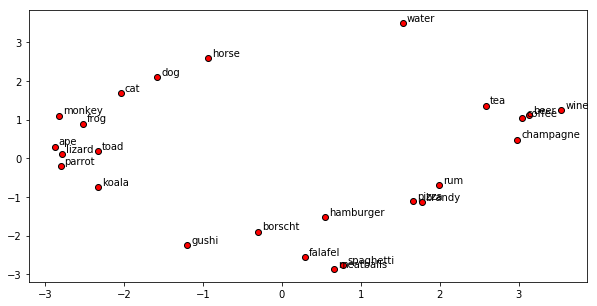

In [15]:
display_pca_scatterplot(model, words=words, sample=300)

In [16]:
import matplotlib
matplotlib.__version__

'3.0.3'